<a href="https://colab.research.google.com/github/khloud-ibrahim/blank-app/blob/main/Mining_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1+Visualizing


In [10]:
from google.colab import files
uploaded = files.upload()


Saving GoogleAds_DataAnalytics_Sales_Uncleaned.csv to GoogleAds_DataAnalytics_Sales_Uncleaned.csv


In [11]:
import pandas as pd

df = pd.read_csv("GoogleAds_DataAnalytics_Sales_Uncleaned.csv")
df.head()


,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [13]:
# Replace suspicious tokens (like 'xx', '?', 'NA') with NaN
#  shows how many invalid values were found and replaced

# Step 1 — Define tokens that represent missing or invalid data
bad_tokens = set(['xx', 'XX', '?', '-', '--', 'NA', 'N/A', 'na', 'n/a',
                  'None', 'none', 'nan', '', ' '])

def normalize_value(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    return np.nan if s in bad_tokens else x

# Step 2 — Identify object columns for cleaning
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(" Object columns to check:", object_cols)

# Step 3 — Count missing/invalid values BEFORE normalization
print("\n Invalid tokens BEFORE cleaning:")
before_invalid = {}
for c in object_cols:
    before_invalid[c] = df[c].astype(str).isin(bad_tokens).sum()
before_invalid = pd.Series(before_invalid)
display(before_invalid[before_invalid > 0].sort_values(ascending=False))

# Step 4 — Apply normalization with .map() (to avoid deprecated applymap)
for col in object_cols:
    df[col] = df[col].map(normalize_value)

# Step 5 — Count missing values AFTER normalization
print("\n Missing values AFTER cleaning:")
after_missing = df[object_cols].isna().sum()
display(after_missing[after_missing > 0].sort_values(ascending=False))

# Step 6 — Show differences (before vs after)
diff = (after_missing - df[object_cols].isna().sum())
print("\n Summary of changes:")
changed = before_invalid[before_invalid > 0]
if not changed.empty:
    print(f" {changed.sum()} invalid values were replaced with NaN across {len(changed)} columns.")
else:
    print(" No invalid tokens found in object columns — data already clean.")

print("\n Suspicious tokens replaced with NaN successfully!")



 Object columns to check: ['Ad_ID', 'Campaign_Name', 'Cost', 'Sale_Amount', 'Ad_Date', 'Location', 'Device', 'Keyword']

 Invalid tokens BEFORE cleaning:


,0
Sale_Amount,139
Cost,97



 Missing values AFTER cleaning:


,0
Sale_Amount,139
Cost,97



 Summary of changes:
 236 invalid values were replaced with NaN across 2 columns.

 Suspicious tokens replaced with NaN successfully!


In [14]:
#  Clean financial columns: remove '$' and ',' and convert to numeric
#  displays missing data before and after cleaning

# Step 1 — Detect possible financial columns
financial_cols = [c for c in ['Cost', 'Sale_Amount', 'Sale Amount', 'Revenue', 'Price'] if c in df.columns]
print(" Detected financial columns:", financial_cols)

if not financial_cols:
    print(" No financial columns found — skipping this step.")
else:
    # Step 2 — Check missing values BEFORE cleaning
    print("\n Missing values BEFORE cleaning:")
    missing_before = df[financial_cols].isna().sum()
    display(missing_before)

    # Step 3 — Clean each financial column
    for col in financial_cols:
        df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True).str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Step 4 — Check missing values AFTER cleaning
    print("\n Missing values AFTER cleaning:")
    missing_after = df[financial_cols].isna().sum()
    display(missing_after)

    # Step 5 — Compare before vs after
    diff = (missing_after - missing_before)
    changed = diff[diff != 0]
    if not changed.empty:
        print("\n Changes summary (difference in missing values after cleaning):")
        display(changed)
    else:
        print("\n No change in missing values — cleaning affected only formatting.")

    print("\n Financial columns cleaned successfully and converted to numeric.")



 Detected financial columns: ['Cost', 'Sale_Amount']

 Missing values BEFORE cleaning:


,0
Cost,97
Sale_Amount,139



 Missing values AFTER cleaning:


,0
Cost,97
Sale_Amount,139



 No change in missing values — cleaning affected only formatting.

 Financial columns cleaned successfully and converted to numeric.


In [15]:
#  Convert numeric-like object columns and handle missing values
#  shows what changed and checks missing data before/after imputation

# Step 1 — Convert object columns that look numeric
converted_cols = []
for col in object_cols:
    coerced = pd.to_numeric(df[col], errors='coerce')
    if coerced.notna().sum() / len(df) >= 0.5:
        df[col] = coerced
        converted_cols.append(col)

if converted_cols:
    print(" Converted to numeric:", converted_cols)
else:
    print(" No object columns were mostly numeric — nothing converted.")

# Step 2 — Separate numeric & categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)

# Step 3 — Check missing values BEFORE imputation
print("\n Missing values BEFORE imputation:")
missing_before = df.isna().sum()
display(missing_before[missing_before > 0].sort_values(ascending=False))

# Step 4 — Compute imputation values
# Median for numeric (robust to outliers)
# Mode for categorical (keeps most frequent class)
medians = df[numeric_cols].median()
modes = {c: df[c].mode().iloc[0] if not df[c].mode().empty else "Unknown" for c in cat_cols}

# Step 5 — Fill missing values (without inplace=True to avoid warnings)
for c in numeric_cols:
    df[c] = df[c].fillna(medians[c])
for c in cat_cols:
    df[c] = df[c].fillna(modes[c])

print("\n Missing values imputed successfully.")
print("   - Numeric: filled with median values")
print("   - Categorical: filled with mode values")

# Step 6 — Check missing values AFTER imputation
print("\n Missing values AFTER imputation:")
missing_after = df.isna().sum()
display(missing_after[missing_after > 0].sort_values(ascending=False))

# Step 7 — Show what changed
diff = (missing_before - missing_after)
diff = diff[diff > 0]
if not diff.empty:
    print("\n Changes summary (missing values reduced):")
    display(diff.sort_values(ascending=False))
else:
    print("\n No missing values were present — nothing changed.")



 Converted to numeric: ['Cost', 'Sale_Amount']

Numeric columns: ['Clicks', 'Impressions', 'Cost', 'Leads', 'Conversions', 'Conversion Rate', 'Sale_Amount']
Categorical columns: ['Ad_ID', 'Campaign_Name', 'Ad_Date', 'Location', 'Device', 'Keyword']

 Missing values BEFORE imputation:


,0
Conversion Rate,626
Sale_Amount,139
Clicks,112
Cost,97
Conversions,74
Impressions,54
Leads,48



 Missing values imputed successfully.
   - Numeric: filled with median values
   - Categorical: filled with mode values

 Missing values AFTER imputation:


,0



 Changes summary (missing values reduced):


,0
Conversion Rate,626
Sale_Amount,139
Clicks,112
Cost,97
Conversions,74
Impressions,54
Leads,48


In [16]:
import pandas as pd
from IPython.display import display

# Backup path
CAT_BACKUP_PATH = "/content/categorical_backup.csv"

# Step 1 — Backup original categorical columns
cat_backup = df[cat_cols].copy()
cat_backup.to_csv(CAT_BACKUP_PATH, index=False)
print(f"Original categorical columns saved to: {CAT_BACKUP_PATH}")

# Step 2 — Display initial info
print("\nNumber of categorical columns before encoding:", len(cat_cols))
print("Categorical columns:")
display(cat_cols)

# Step 3 — Define encoding types
to_one_hot = [c for c in cat_cols if df[c].nunique() <= 20]
to_label = [c for c in cat_cols if df[c].nunique() > 20]

print("\nColumns for One-Hot Encoding:", to_one_hot)
print("Columns for Label Encoding:", to_label)

# Step 4 — Track initial number of columns
initial_cols = df.shape[1]

# Step 5 — Apply encodings
df_encoded = pd.get_dummies(df, columns=to_one_hot, drop_first=True)

from pandas.api.types import is_object_dtype
for c in to_label:
    if is_object_dtype(df_encoded[c]):
        df_encoded[c] = pd.factorize(df_encoded[c])[0]

# Step 6 — Compare before and after encoding
final_cols = df_encoded.shape[1]
added_cols = final_cols - initial_cols

print(f"\nColumns BEFORE encoding: {initial_cols}")
print(f"Columns AFTER encoding:  {final_cols}")
print(f"Columns added due to one-hot encoding: +{added_cols}")

# Step 7 — Verify encoding success
encoded_check = [c for c in df_encoded.columns if any(prefix in c for prefix in to_one_hot)]
print("\nEncoding completed successfully.")
print(f"  - One-hot encoded columns created: {len(encoded_check)}")
print(f"  - Label encoded columns replaced: {len(to_label)}")

# Optional small preview
print("\nPreview of encoded dataset:")
display(df_encoded.head(3))


Original categorical columns saved to: /content/categorical_backup.csv

Number of categorical columns before encoding: 6
Categorical columns:


['Ad_ID', 'Campaign_Name', 'Ad_Date', 'Location', 'Device', 'Keyword']


Columns for One-Hot Encoding: ['Campaign_Name', 'Location', 'Device', 'Keyword']
Columns for Label Encoding: ['Ad_ID', 'Ad_Date']

Columns BEFORE encoding: 13
Columns AFTER encoding:  28
Columns added due to one-hot encoding: +15

Encoding completed successfully.
  - One-hot encoded columns created: 19
  - Label encoded columns replaced: 2

Preview of encoded dataset:


,Ad_ID,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Campaign_Name_Data Analytics Corse,...,Device_TABLET,Device_Tablet,Device_desktop,Device_mobile,Device_tablet,Keyword_data analitics online,Keyword_data analytics course,Keyword_data anaytics training,Keyword_learn data analytics,Keyword_online data analytic
0,0,104.0,4498.0,231.88,14.0,7.0,0.058,1892.0,0,False,...,False,False,True,False,False,False,False,False,True,False
1,1,173.0,5107.0,216.84,10.0,8.0,0.046,1679.0,1,False,...,False,False,False,True,False,False,True,False,False,False
2,2,90.0,4544.0,203.66,26.0,9.0,0.046,1624.0,2,False,...,False,False,False,False,False,True,False,False,False,False



===== STARTING VISUALISATION SECTION =====

Number of numeric columns: 7
Number of categorical columns: 6

Plotting numeric feature distributions...


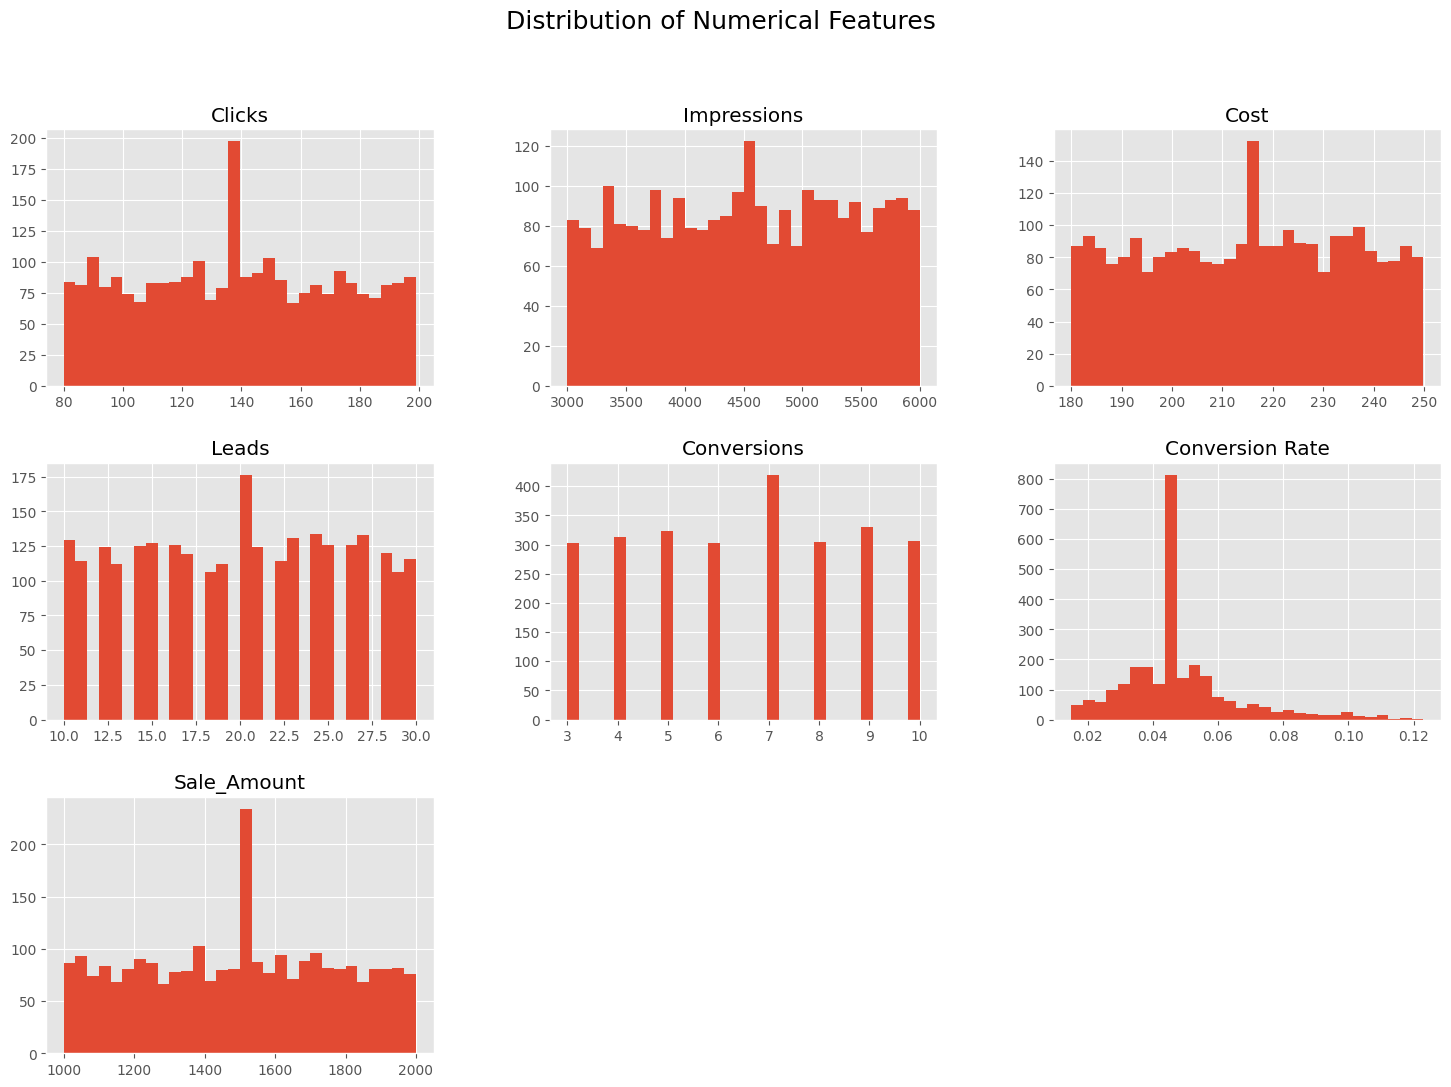

Plotting boxplots for numeric features...


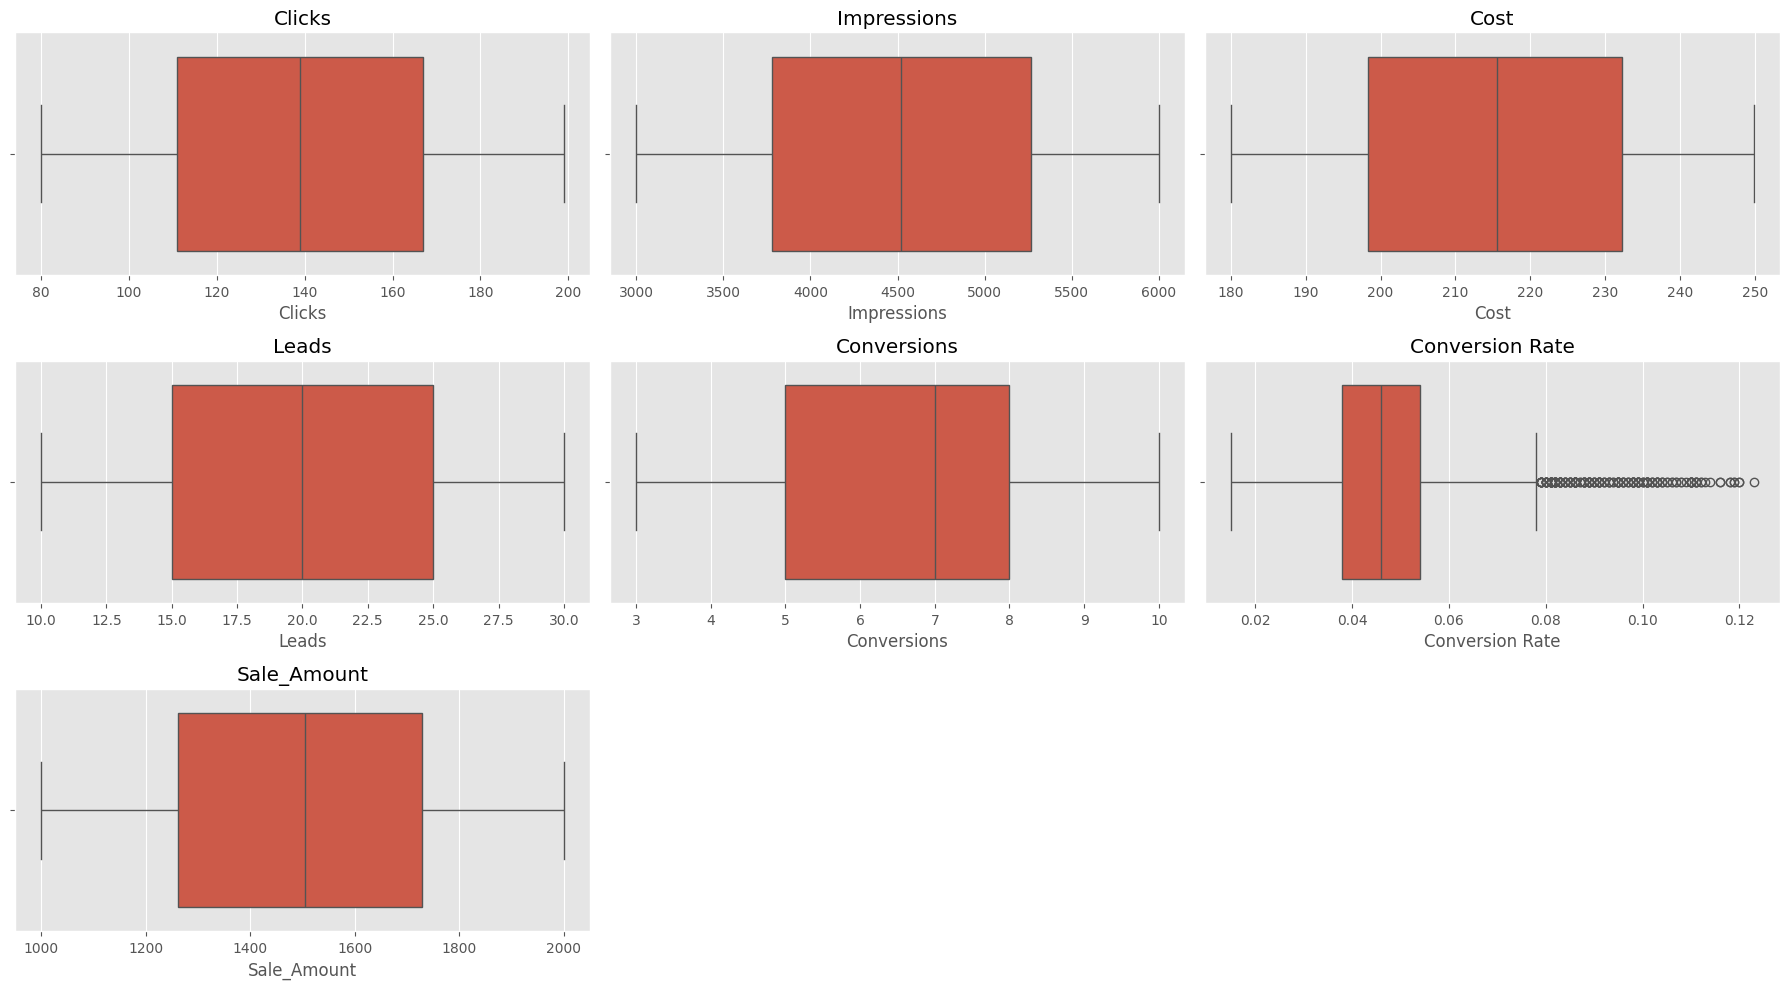

Plotting categorical countplots...


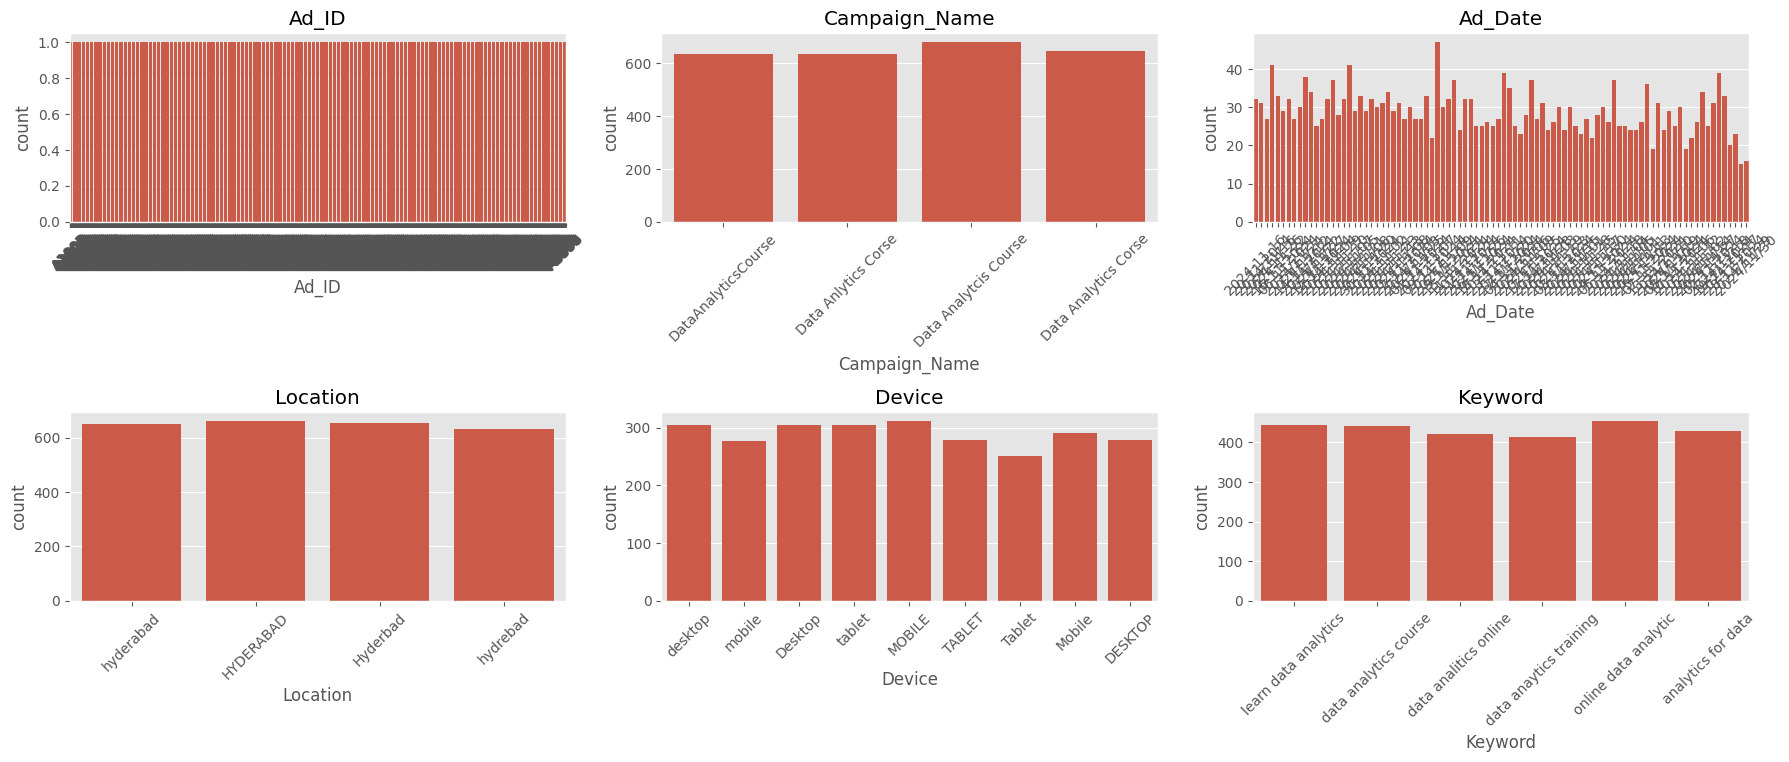

Plotting correlation heatmap...


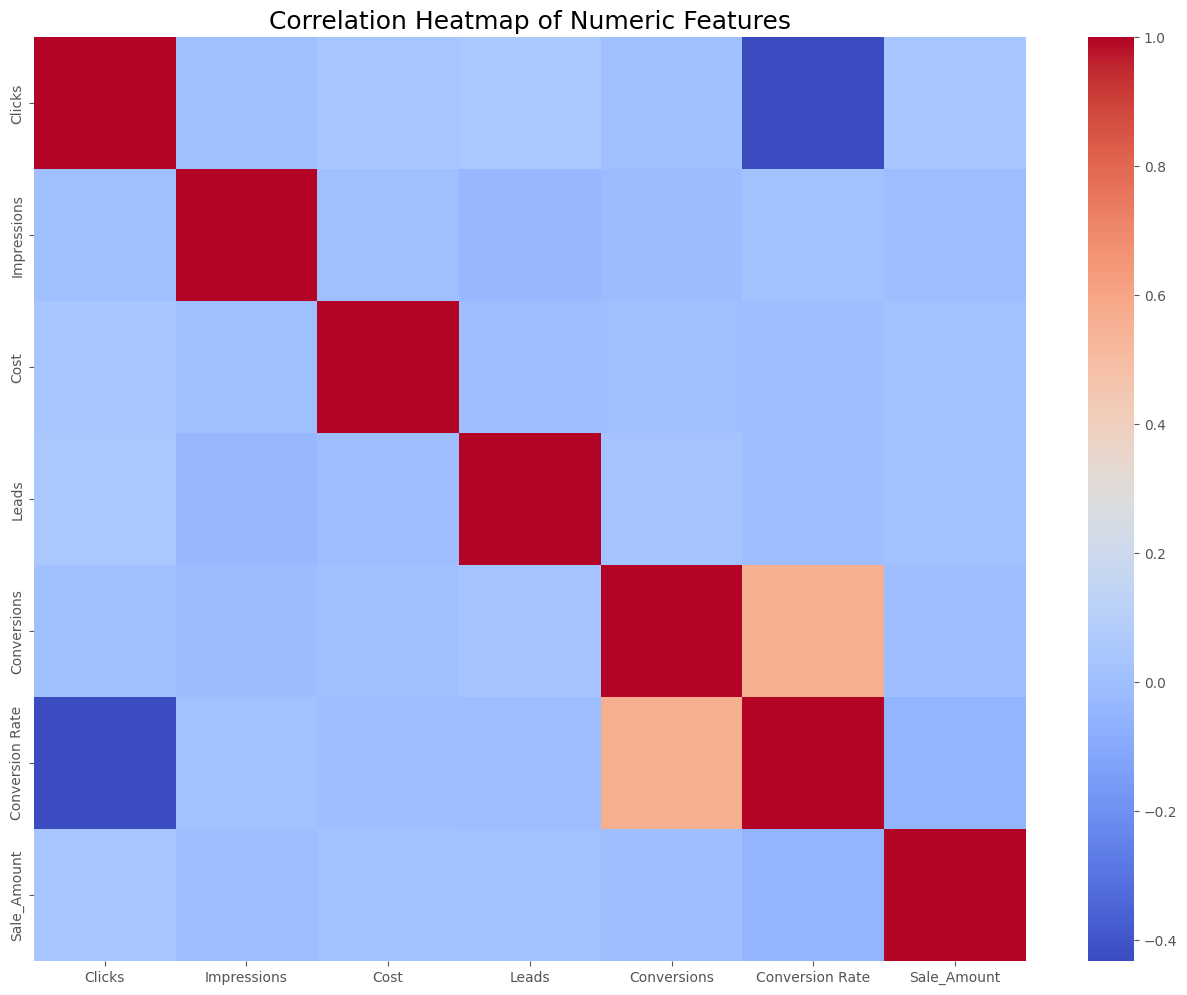

Plotting pairplot for numeric sample...


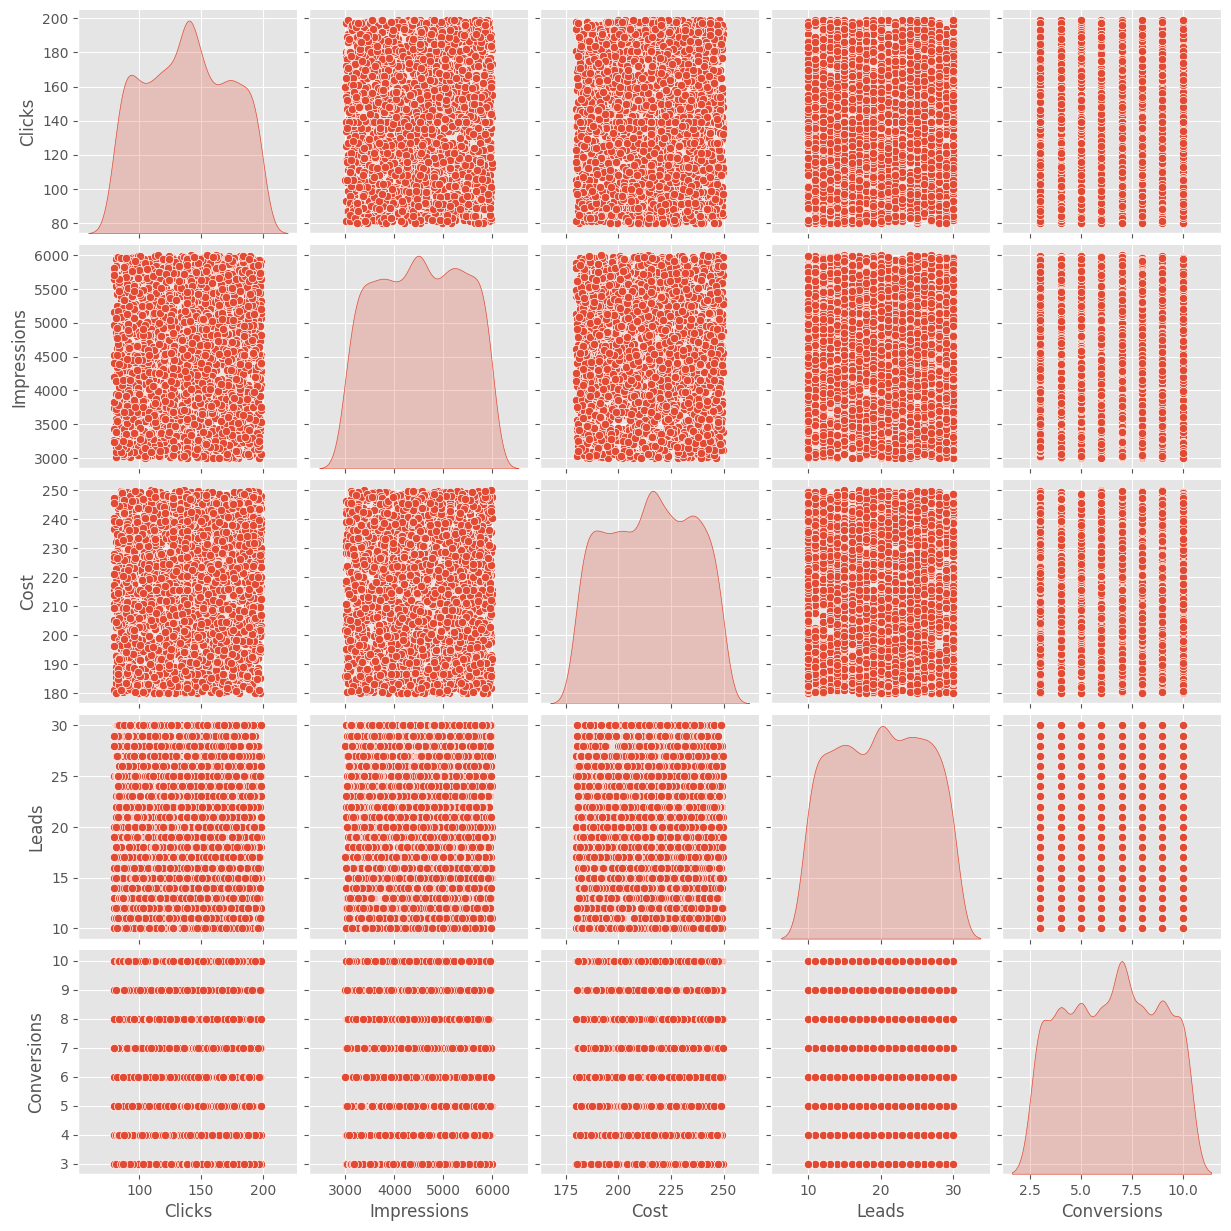

Plotting missing data heatmap...


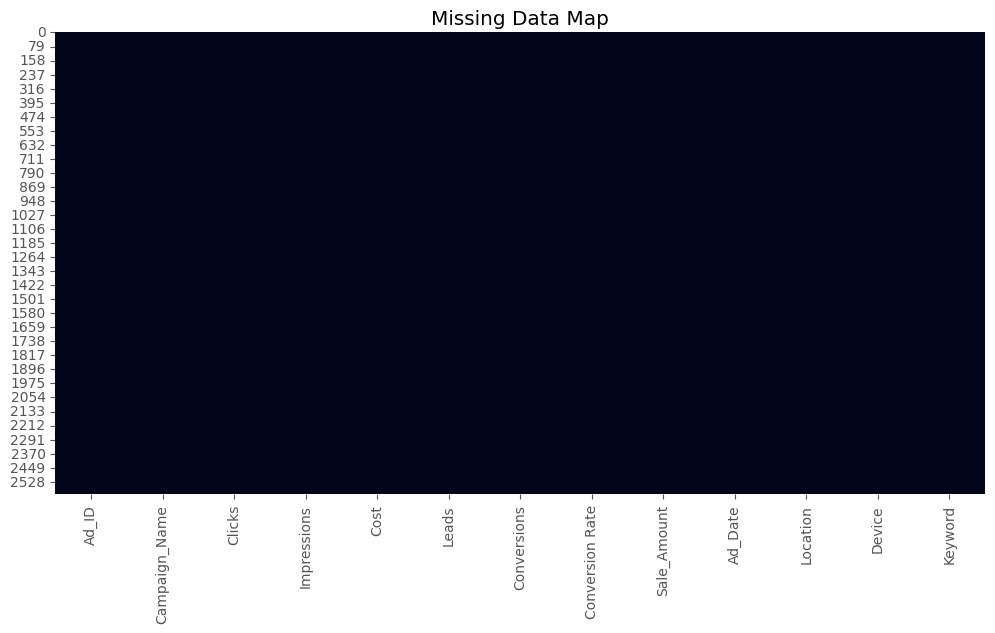


===== VISUALISATION SECTION COMPLETED SUCCESSFULLY =====



In [17]:

#   VISUALISATION SECTION
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

print("\n===== STARTING VISUALISATION SECTION =====\n")

# ---------------------------------------------------------
# 1) Summary
# ---------------------------------------------------------
print(f"Number of numeric columns: {len(numeric_cols)}")
print(f"Number of categorical columns: {len(cat_cols)}\n")

# ---------------------------------------------------------
# 2) Distribution Plots for Numeric Columns
# ---------------------------------------------------------
print("Plotting numeric feature distributions...")

df[numeric_cols].hist(figsize=(18, 12), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=18)
plt.show()

# ---------------------------------------------------------
# 3) Boxplots for Outlier Detection (Numeric)
# ---------------------------------------------------------
print("Plotting boxplots for numeric features...")

plt.figure(figsize=(18, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols)//3)+1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4) Countplots for Categorical Variables
# ---------------------------------------------------------
print("Plotting categorical countplots...")

plt.figure(figsize=(18, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot((len(cat_cols)//3)+1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 5) Correlation Heatmap (Numeric Features)
# ---------------------------------------------------------
print("Plotting correlation heatmap...")

plt.figure(figsize=(16, 12))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features", fontsize=18)
plt.show()

# ---------------------------------------------------------
# 6) Pairplot (Sample of Numeric Columns)
# ---------------------------------------------------------
print("Plotting pairplot for numeric sample...")

sample_cols = numeric_cols[:5]  # Choose only first 5 to avoid huge plots
sns.pairplot(df[sample_cols], diag_kind="kde")
plt.show()

# ---------------------------------------------------------
# 7) Missing Data Map
# ---------------------------------------------------------
print("Plotting missing data heatmap...")

plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Data Map")
plt.show()

print("\n===== VISUALISATION SECTION COMPLETED SUCCESSFULLY =====\n")

